# MLP Básica (Core)

## Descripción

En esta actividad, implementarás una red neuronal de perceptrón multicapa (MLP) básica utilizando el dataset «Breast Cancer Wisconsin (Diagnostic)» disponible en Kaggle. Este dataset es adecuado para la clasificación binaria, donde la red MLP predecirá si un tumor es benigno o maligno basado en una serie de características.

**Enlace al dataset**: [Breast Cancer Wisconsin (Diagnostic)](https://www.kaggle.com/uciml/breast-cancer-wisconsin-data)

## Objetivo

El objetivo de la actividad es implementar una red MLP básica con una capa oculta, entrenarla en el dataset de cáncer de mama y evaluar su rendimiento en términos de precisión y otras métricas de clasificación.

## Instrucciones

### 1. Carga de datos
- Descarga y carga el dataset desde Kaggle. Observa las características disponibles, que incluyen variables como el radio del núcleo del tumor, la textura, la suavidad, entre otras.
- Asegúrate de verificar si hay valores nulos y manejar cualquier valor atípico que pudiera estar presente.

### 2. Exploración y preprocesamiento de datos
- Realiza una normalización de los datos para asegurar que todas las características se encuentren en el mismo rango y mejoren el rendimiento de la red neuronal.
- Divide el dataset en conjuntos de entrenamiento y prueba (por ejemplo, 80% entrenamiento y 20% prueba).

### 3. Implementación de la MLP
- Implementa una red MLP utilizando Keras o cualquier otra biblioteca de deep learning. La red debe incluir:
  - Una capa de entrada que coincida con el número de características del dataset.
  - Una capa oculta con al menos 32 neuronas y una función de activación ReLU.
  - Una capa de salida con una única neurona usando la función de activación sigmoide para la clasificación binaria.
- Utiliza la función de pérdida binaria (`binary_crossentropy`) y el optimizador Adam.

### 4. Entrenamiento del modelo
- Entrena la red en el conjunto de entrenamiento durante al menos 50 épocas. Asegúrate de monitorizar la pérdida y la precisión tanto en el conjunto de entrenamiento como en el conjunto de validación.
- Visualiza las curvas de aprendizaje que muestran cómo evolucionan la pérdida y la precisión durante el entrenamiento.

### 5. Evaluación del modelo
- Evalúa el modelo en el conjunto de prueba utilizando métricas como:
  - Precisión (accuracy)
  - Recall
  - F1-score
  - Matriz de confusión
- Discute si la red MLP básica es adecuada para este tipo de datos y cómo podría mejorarse.

## Conclusión

- Esta actividad tiene como objetivo principal el diseño y entrenamiento de una red MLP para la clasificación binaria de tumores. El análisis de los resultados permitirá determinar si una red básica es suficiente o si se requieren arquitecturas más complejas.


In [119]:

# Importar librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


In [120]:
# 1. Carga de datos
dataset_path = r'C:\Users\GIGABYTE\Documents\tareas_bootcamp_coding_dojo\mod_3_advanced_machine_learning\data\data.csv'  
df_train = pd.read_csv(dataset_path)


In [121]:
# Exploración inicial de datos
print("Primeras filas del dataset:")
df_train.head().T


Primeras filas del dataset:


,0,1,2,3,4
id,842302,842517,84300903,84348301,84358402
diagnosis,M,M,M,M,M
radius_mean,17.99,20.57,19.69,11.42,20.29
texture_mean,10.38,17.77,21.25,20.38,14.34
perimeter_mean,122.8,132.9,130.0,77.58,135.1
area_mean,1001.0,1326.0,1203.0,386.1,1297.0
smoothness_mean,0.1184,0.08474,0.1096,0.1425,0.1003
compactness_mean,0.2776,0.07864,0.1599,0.2839,0.1328
concavity_mean,0.3001,0.0869,0.1974,0.2414,0.198
concave points_mean,0.1471,0.07017,0.1279,0.1052,0.1043


In [122]:
print("\nInformación del dataset:")
df_train.info()


Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  

In [123]:
# Renombrar columnas del dataset
df_train.columns = (
    df_train.columns
    .str.strip()               # Elimina espacios iniciales y finales
    .str.replace("'", "")      # Elimina comillas simples
    .str.replace("-", "_")     # Reemplaza guiones por guiones bajos
    .str.replace(" ", "_")     # Reemplaza espacios por guiones bajos
    .str.lower()               # Convierte todo a minúsculas
)

# Mostrar nombres de las columnas normalizados
print(df_train.columns)

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave_points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave_points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave_points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'unnamed:_32'],
      dtype='object')


In [124]:
# 2. Exploración y Preprocesamiento

# Manejo de valores nulos
qsna=df_train.shape[0]-df_train.isnull().sum(axis=0)
qna=df_train.isnull().sum(axis=0)
ppna=round(100*(df_train.isnull().sum(axis=0)/df_train.shape[0]),2)
aux= {'datos sin NAs en q': qsna, 'Na en q': qna ,'Na en %': ppna}
na=pd.DataFrame(data=aux)
na.sort_values(by='Na en %',ascending=False)

,datos sin NAs en q,Na en q,Na en %
unnamed:_32,0,569,100.0
id,569,0,0.0
diagnosis,569,0,0.0
texture_mean,569,0,0.0
radius_mean,569,0,0.0
area_mean,569,0,0.0
smoothness_mean,569,0,0.0
compactness_mean,569,0,0.0
perimeter_mean,569,0,0.0
concave_points_mean,569,0,0.0


In [125]:
# Eliminar la columna del id para evitar que el modelo se ajuste a ella y unnamed:_32
df_train = df_train.drop(columns=['id','unnamed:_32'])

In [126]:
# Identificar duplicados
duplicados_train = df_train.duplicated()

# Obtener cantidad de duplicados
total_dup_train = duplicados_train.sum()

print(f"Total de registros duplicados en train: {total_dup_train}")

Total de registros duplicados en train: 0


In [127]:
# Estadísticas descriptivas
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
radius_mean,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
texture_mean,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
perimeter_mean,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
area_mean,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
smoothness_mean,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
compactness_mean,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
concavity_mean,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
concave_points_mean,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
symmetry_mean,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
fractal_dimension_mean,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


In [128]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Convertir las etiquetas a binario (Maligno=1, Benigno=0)
df_train['diagnosis'] = df_train['diagnosis'].apply(lambda x: 1 if x == 'M' else 0)

# Separar características (X) y etiquetas (y)
X = df_train.drop(columns=['diagnosis'])
y = df_train['diagnosis']

# Normalización de las características
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# División en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [129]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Crear la arquitectura de la red MLP
model = Sequential([
    Dense(32, activation='relu', input_shape=(X_train.shape[1],)),  # Capa oculta
    Dense(1, activation='sigmoid')  # Capa de salida
])

# Compilar el modelo
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Resumen del modelo
model.summary()


c:\Users\GIGABYTE\anaconda3\envs\deepL\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_16 (Dense)                │ (None, 32)             │           992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,025 (4.00 KB)

 Trainable params: 1,025 (4.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.8591 - loss: 0.4977 - val_accuracy: 0.8901 - val_loss: 0.3656
Epoch 2/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9142 - loss: 0.3421 - val_accuracy: 0.9560 - val_loss: 0.2761
Epoch 3/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9411 - loss: 0.2594 - val_accuracy: 0.9670 - val_loss: 0.2232
Epoch 4/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9339 - loss: 0.2104 - val_accuracy: 0.9670 - val_loss: 0.1907
Epoch 5/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9567 - loss: 0.1706 - val_accuracy: 0.9560 - val_loss: 0.1700
Epoch 6/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9483 - loss: 0.1556 - val_accuracy: 0.9560 - val_loss: 0.1556
Epoch 7/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9574 - loss: 0.1272 - val_accuracy: 0.9670 - val_loss: 0.1442
Epoch 8/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9653 - loss: 0.1169 - val_accuracy: 0.9780 - val_loss

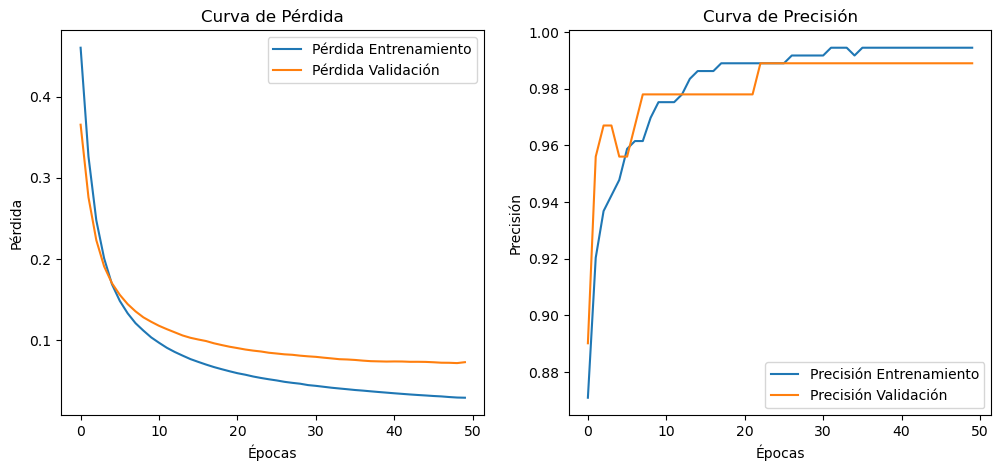

In [130]:
# Entrenamiento
history = model.fit(X_train, y_train, validation_split=0.2, epochs=50, batch_size=32, verbose=1)

# Visualización de curvas de aprendizaje
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Pérdida Entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida Validación')
plt.title('Curva de Pérdida')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Precisión Entrenamiento')
plt.plot(history.history['val_accuracy'], label='Precisión Validación')
plt.title('Curva de Precisión')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()

plt.show()


In [131]:
from sklearn.metrics import classification_report, confusion_matrix

# Evaluar el modelo en el conjunto de prueba
y_pred = (model.predict(X_test) > 0.5).astype("int32")

# Métricas de evaluación
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Matriz de Confusión:\n", confusion_matrix(y_test, y_pred))


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98        71
           1       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114

Matriz de Confusión:
 [[70  1]
 [ 2 41]]


1. **Resumen de la arquitectura del modelo:**
   
**Capas del modelo:**
La primera capa (dense_16) es una capa densa con 32 neuronas. La forma de salida es (None, 32), lo que significa que cada entrada generará una salida de 32 valores. Esta capa tiene 992 parámetros entrenables.
La segunda capa (dense_17) es otra capa densa con 1 neurona, correspondiente a la salida del modelo. La forma de salida es (None, 1) y tiene 33 parámetros entrenables.
Total de parámetros entrenables: 1,025 (esto incluye todos los parámetros de las capas).

2. **Entrenamiento (Epochs):**
El entrenamiento del modelo se realiza en 50 épocas (Epochs).

Durante cada época, el modelo ajusta los parámetros para minimizar el error (función de pérdida) y mejorar la precisión.

**Algunos detalles importantes de las primeras épocas:**

Epoch 1: Precisión en entrenamiento del 85.91%, pérdida de 0.4977. Precisión en validación del 89.01% y pérdida de 0.3656.

Epoch 2: Precisión en entrenamiento de 91.42%, pérdida de 0.3421. Precisión en validación de 95.60% y pérdida de 0.2761.

Epoch 3: Precisión en entrenamiento de 94.11%, pérdida de 0.2594. Precisión en validación de 96.70% y pérdida de 0.2232.

3. **Progreso durante las épocas:**
4. 
La precisión de entrenamiento mejora con cada época, lo que sugiere que el modelo está aprendiendo y ajustando sus parámetros correctamente.

La precisión de validación también aumenta significativamente, lo que indica que el modelo se generaliza bien a los datos de validación.

La pérdida disminuye a medida que avanzan las épocas, lo que también es un signo de que el modelo está mejorando su capacidad de hacer predicciones precisas.